In [ ]:
import torch
from transformers import BertTokenizer, GPT2Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
# GPT-2 tokenizer and model
tokenizer = BertTokenizer.from_pretrained("F:/project/Attention/gpt2-chinese-cluecorpussmall")
model = GPT2Model.from_pretrained("F:/project/Attention/gpt2-chinese-cluecorpussmall", output_hidden_states=True)

model.eval()


GPT2Model(
  (wte): Embedding(21128, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

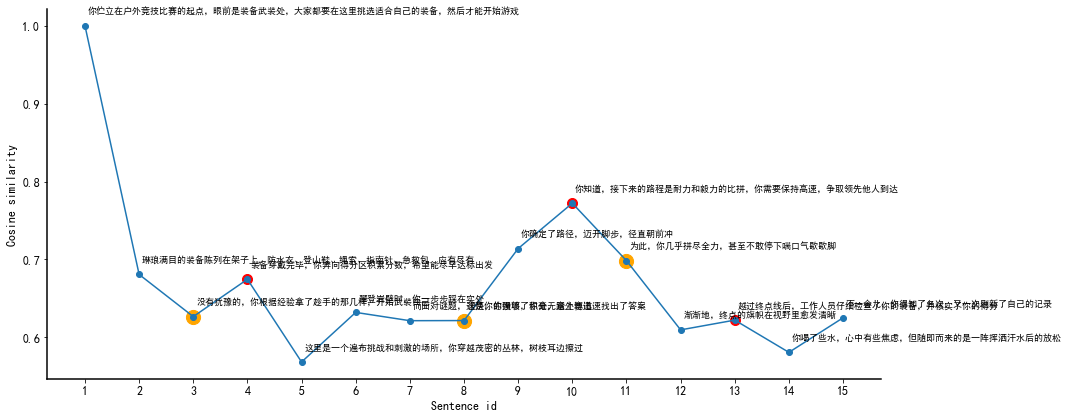

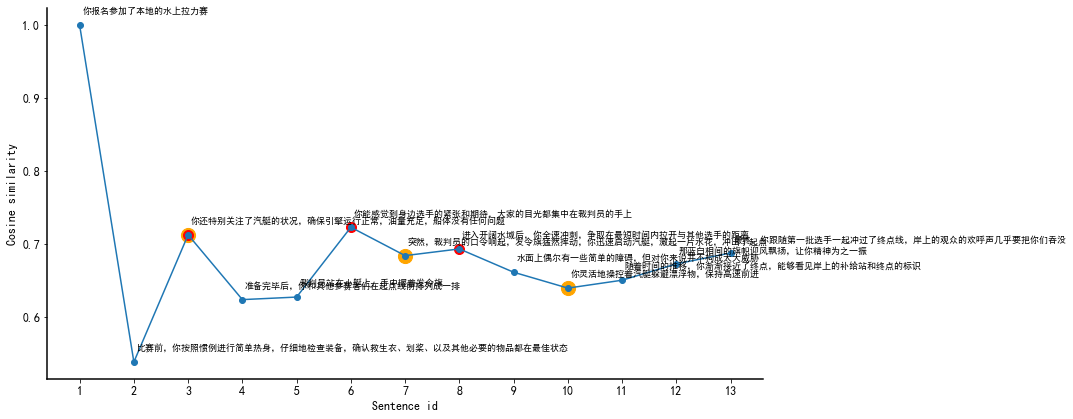

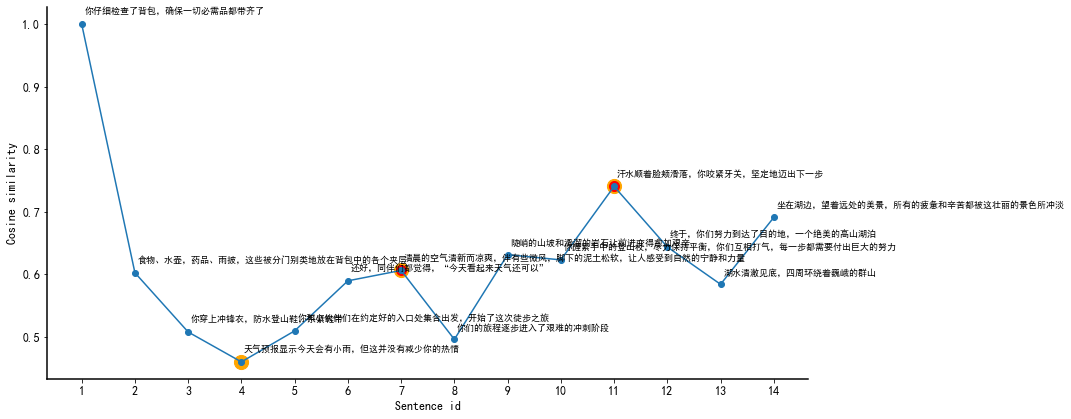

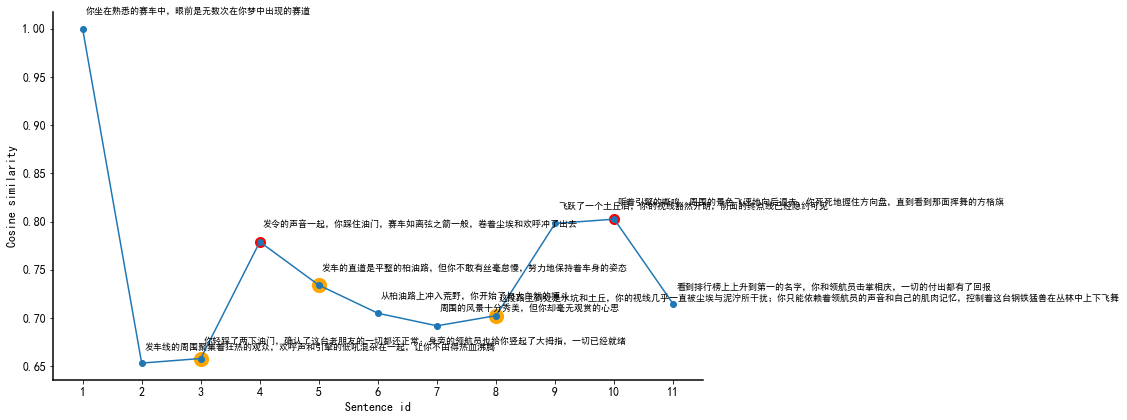

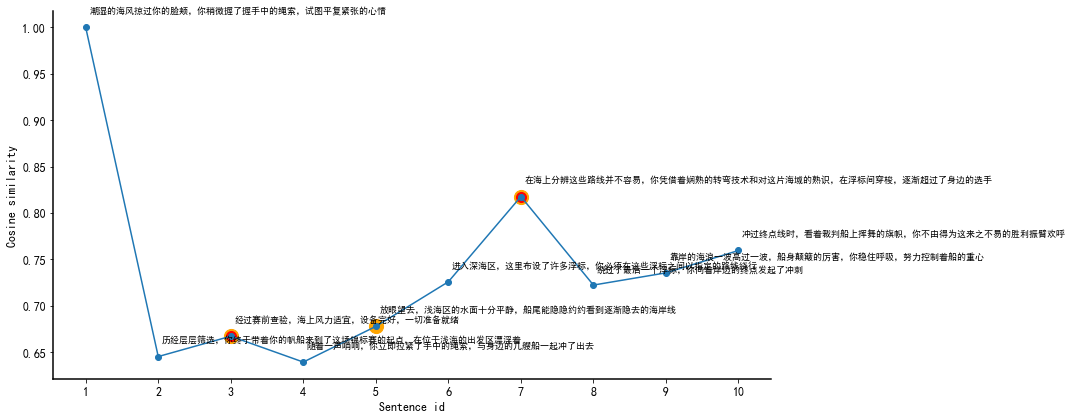

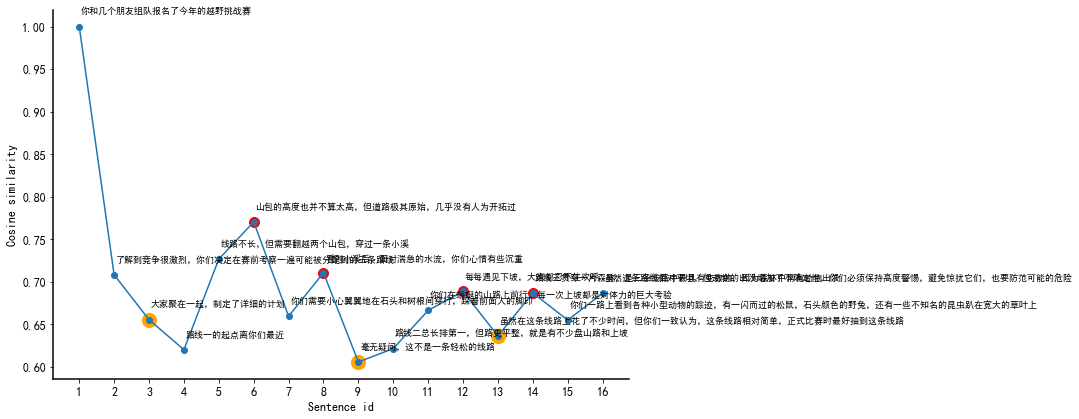

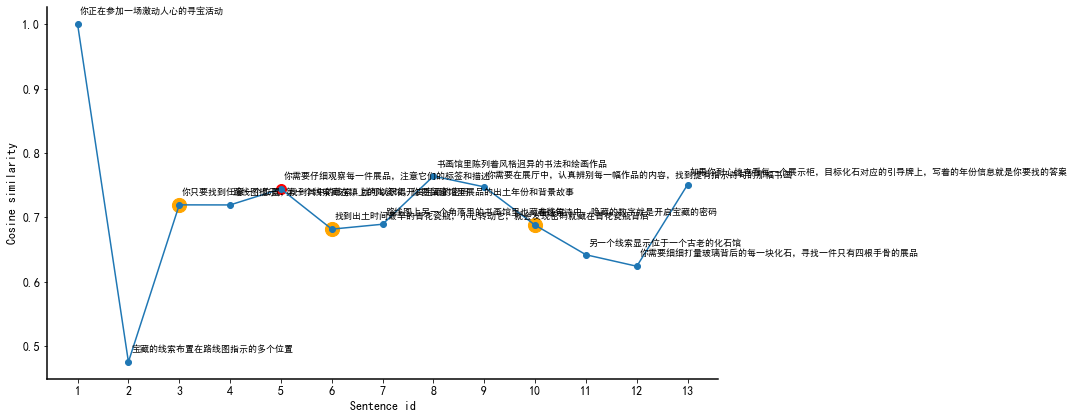

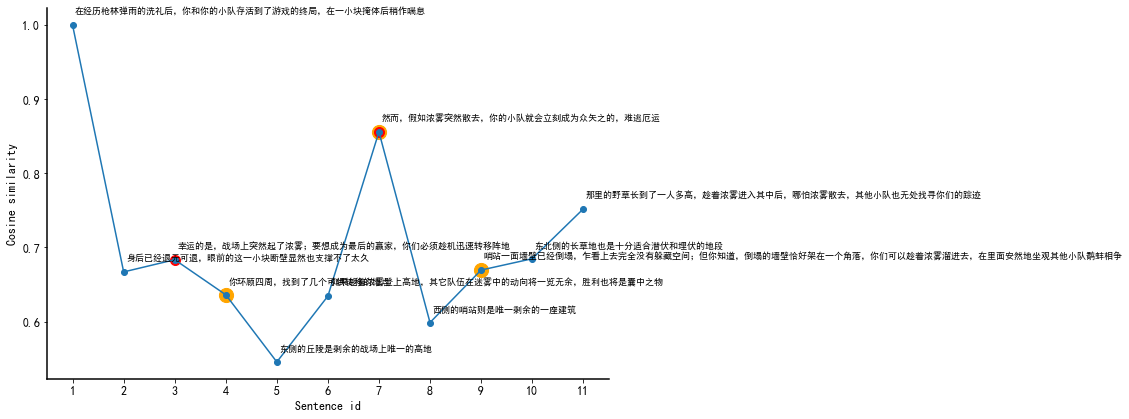

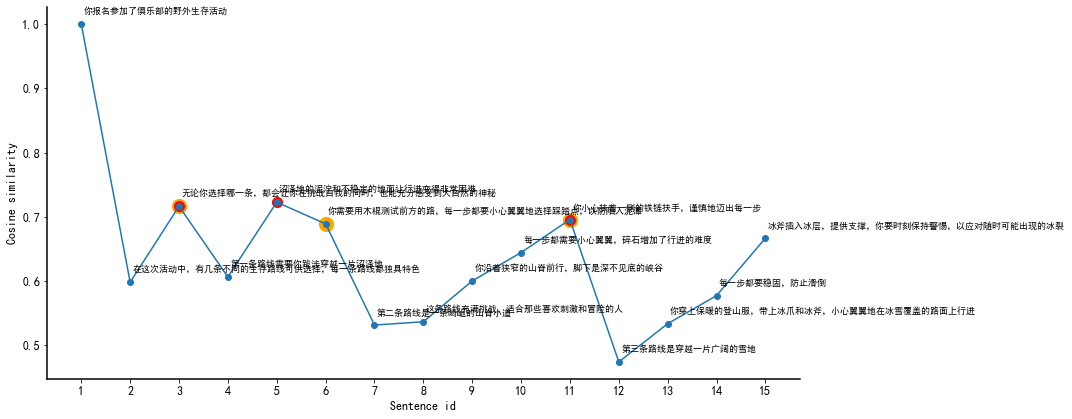

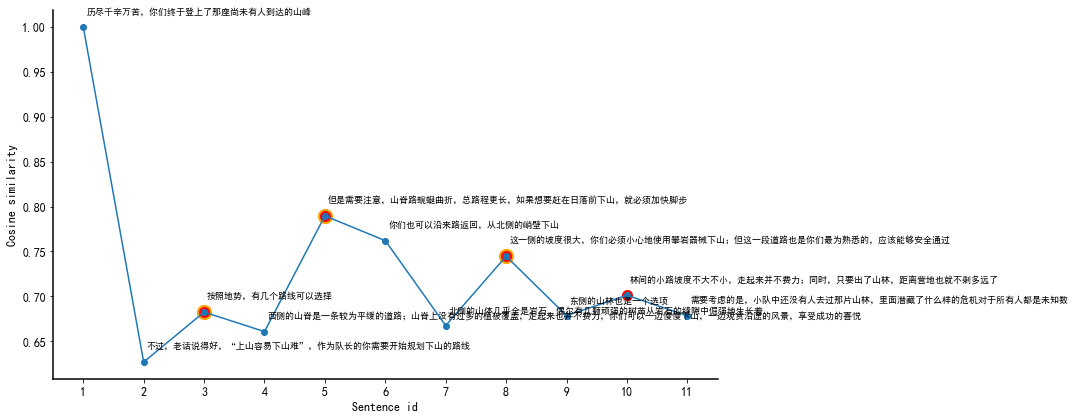

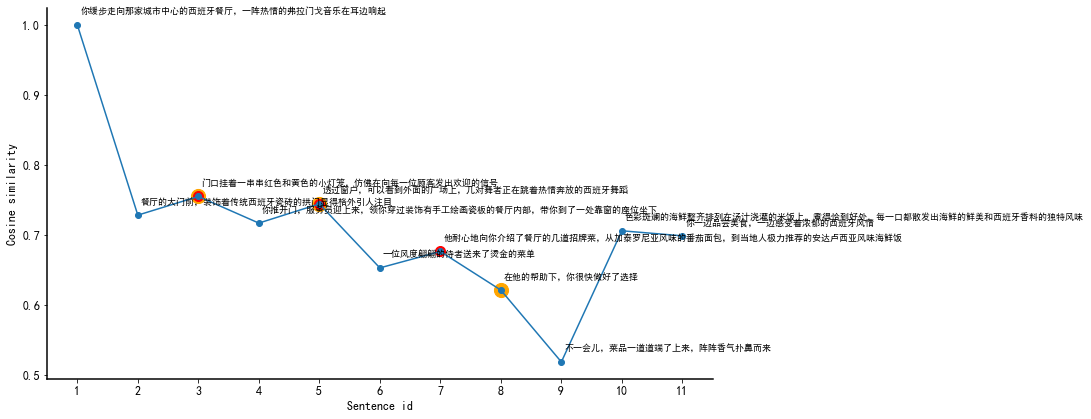

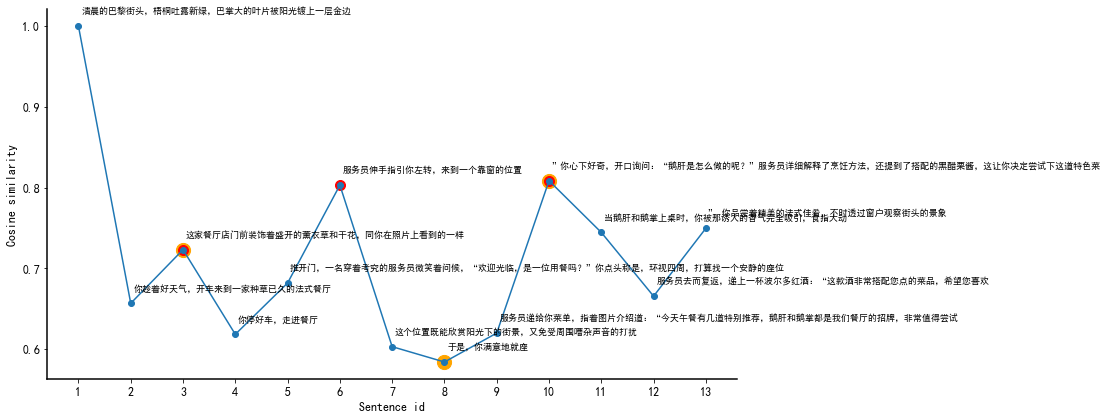

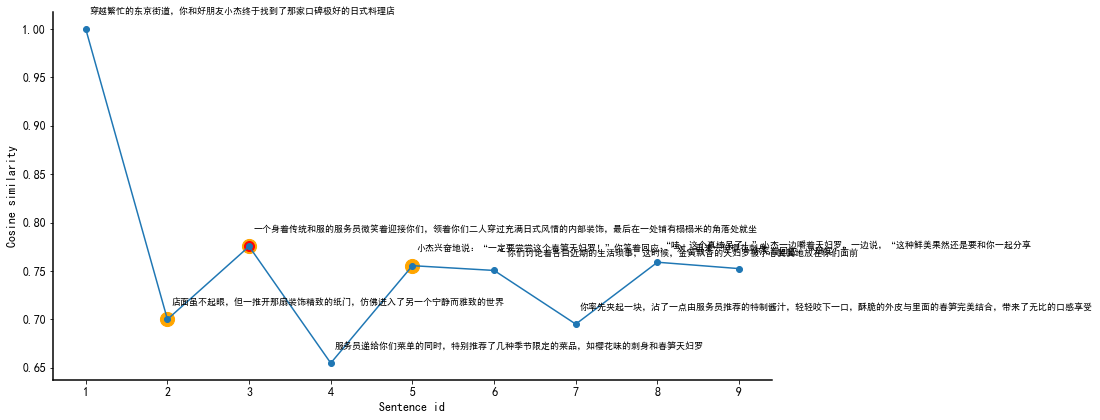

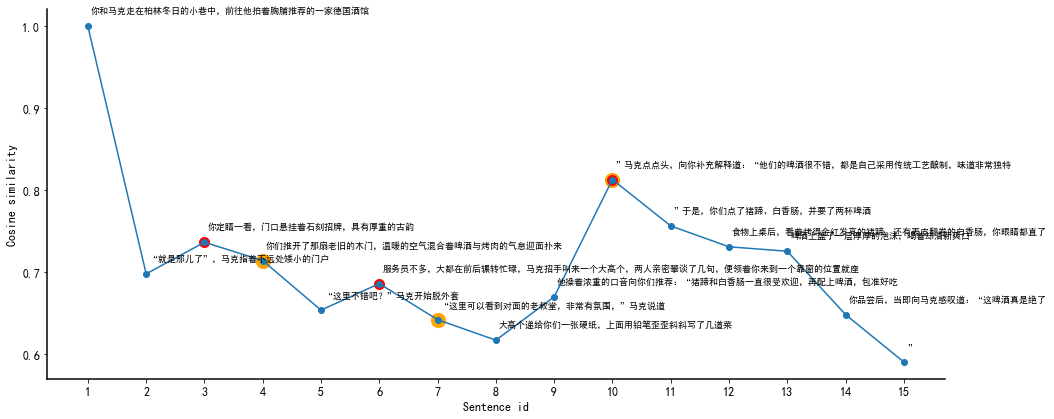

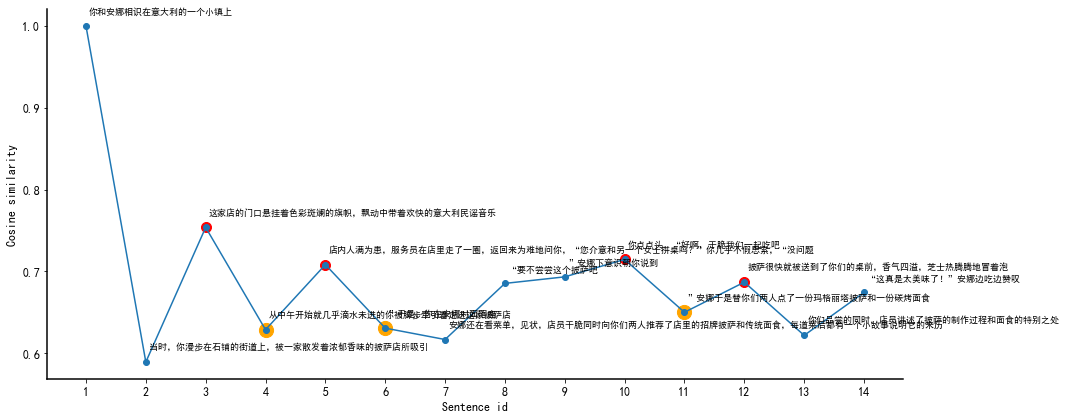

In [ ]:
# read in corpus
with open("F:/project/Attention/navi_chain.txt", "r", encoding="utf-8") as file:
    corpus = [line.strip() for line in file.readlines()]

with open("F:/project/Attention/true_sep.txt", "r", encoding="utf-8") as file:
    true_sep = [line.strip() for line in file.readlines()]

import os
base_dir = 'F:/project/Attention/'
fig_outputpath = os.path.join(base_dir, 'StoryEmbeddings_CosineSimi_plot')
os.makedirs(fig_outputpath, exist_ok=True)

def get_sentence_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    # avg value of last hidden layer as sentence embedding
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

for corpus_index, text in enumerate(corpus):  

    sentences = text.split('。')
    sentences = [sentence for sentence in sentences if sentence]

    sep = true_sep[corpus_index].split(',')
    sep = [int(i) for i in sep if i]

    sentence_embeddings = [get_sentence_embedding(sentence) for sentence in sentences]

    a=cosine_similarity(sentence_embeddings)
    similarities = []
    delta_similarities = []
    for i, embedding in enumerate(sentence_embeddings):
        if i < 1:
            similarities.append(1) 
            delta_similarities.append(0)
        else:
            similarities.append(a[i,i-1]) 
            delta_similarities.append(similarities[i]-similarities[i-1])


    Index = [delta_similarities[i] * delta_similarities[i+1] for i in range(len(delta_similarities)-1)]
    Index =  Index + [0]

    # Font
    plt.rcParams['font.sans-serif'] = ['SimHei', 'SimSun', 'KaiTi', 'FangSong'] 
    plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})
    plt.rcParams['axes.unicode_minus'] = False 

    fig, ax = plt.subplots(figsize=(15, 6))

    for i in sep:
        plt.scatter(i-1, similarities[i-1], color='orange', s=200, marker='o')

    for i in range(len(delta_similarities)):
        if np.sign(Index[i]) < 0 and i != 0 and delta_similarities[i+1] < -0.02:
            plt.scatter(i, similarities[i], color='red', s=100, marker='o')

    plt.plot(range(len(sentences)), similarities, marker='o', linestyle='-')
    
    # mark sentences
    for i, sentence in enumerate(sentences):
        plt.text(i+0.05, similarities[i]+0.013, sentence, fontsize=9, ha='left', va='bottom')

    plt.xticks(range(len(sentences)), labels=range(1, len(sentences)+1))
    plt.xlabel("Sentence id")
    plt.ylabel("Cosine similarity")

    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
    for axis in ['top', 'right']:  
        ax.spines[axis].set_visible(False)

    if corpus_index in range(5):
        index = str(corpus_index+1)
        title = f'story_chain_adven{index}.png'
    elif corpus_index in range(5, 10):
        index = str(corpus_index-5+1)
        title = f'story_sum_adven{index}.png'
    else:
        index = str(corpus_index-10+1)
        title = f'story_chain_eat{index}.png'

    plt.tight_layout()
    plt.savefig(
        os.path.join(fig_outputpath, title),
        dpi=300,
        format='png'
    )
    plt.show()


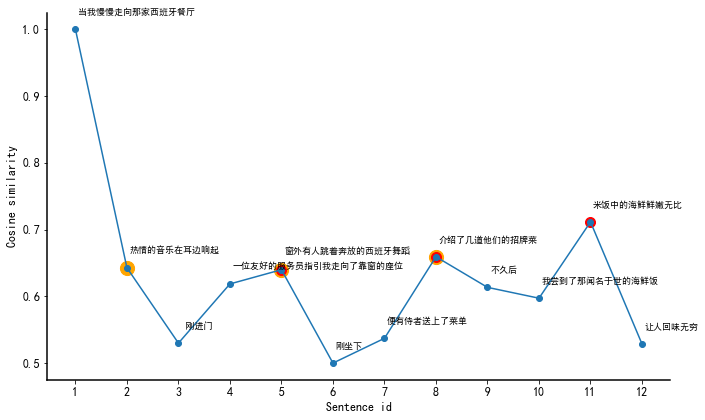

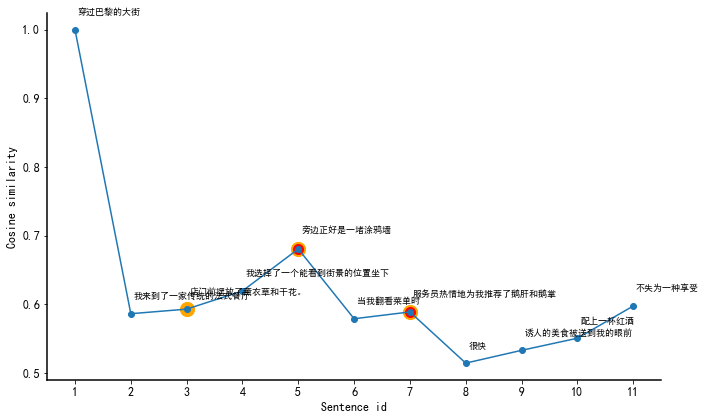

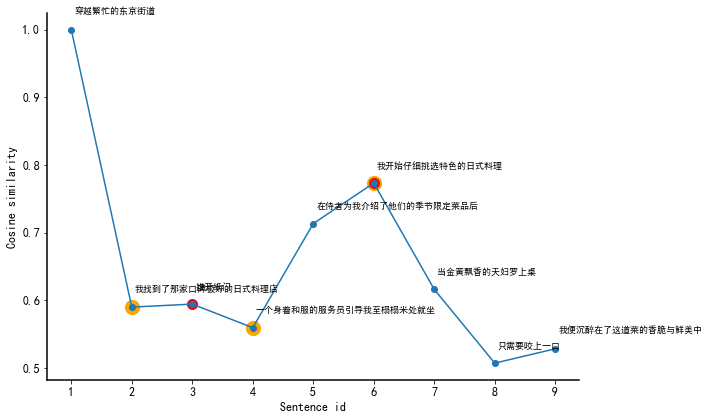

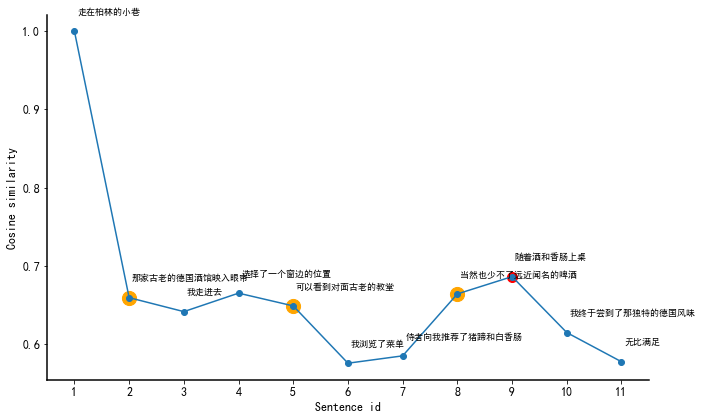

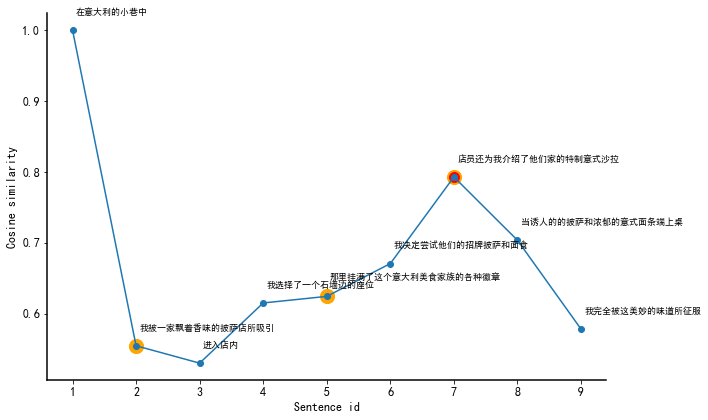

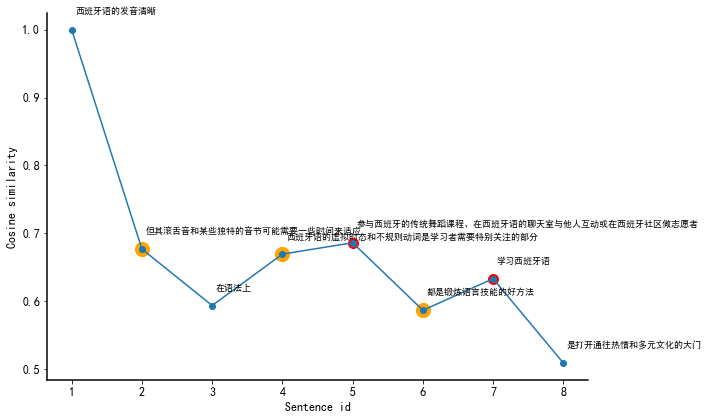

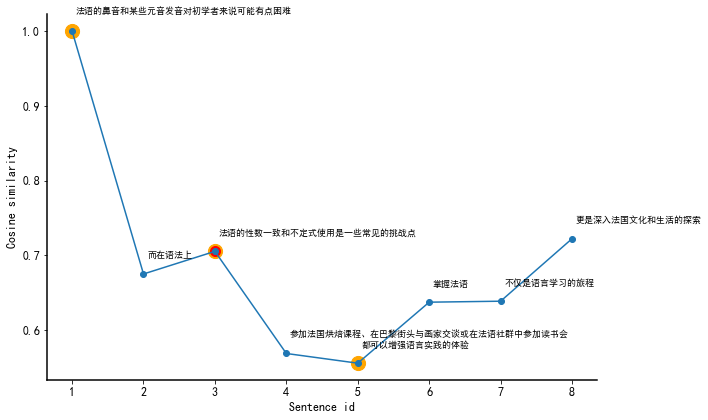

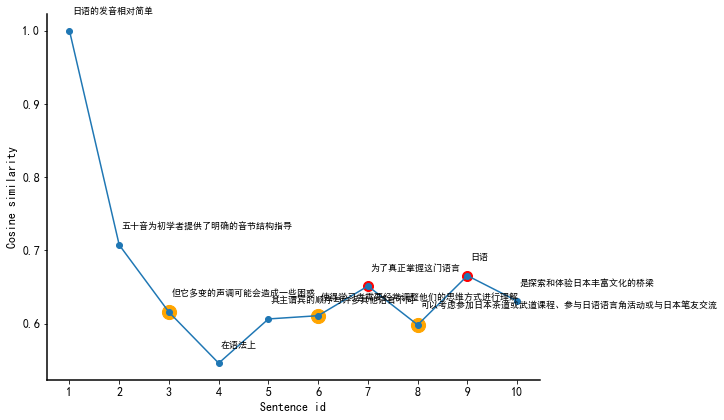

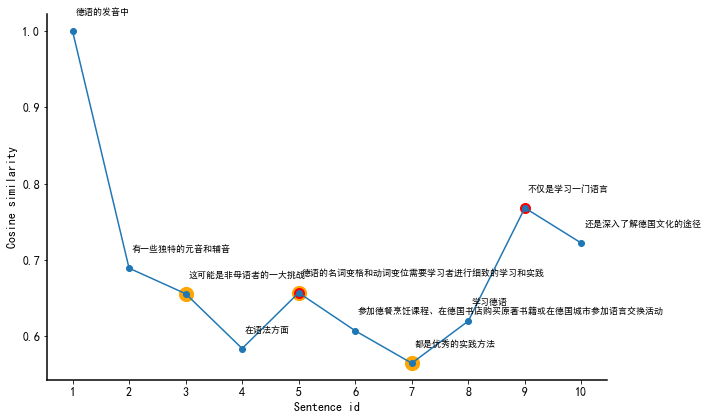

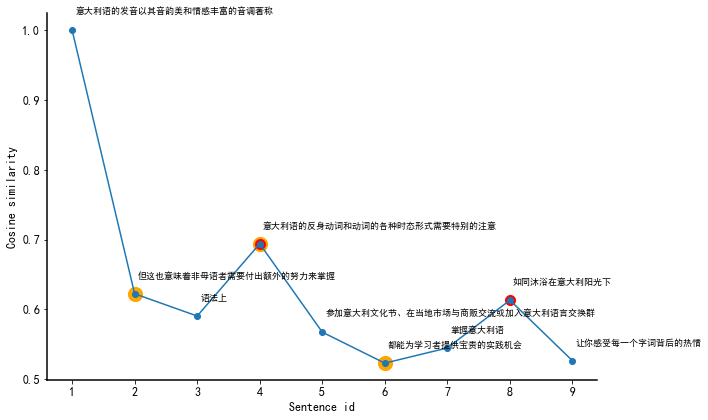

In [ ]:
# corpus
with open("F:/project/Attention/corpus2.txt", "r", encoding="utf-8") as file:
    corpus = [line.strip() for line in file.readlines()]

with open("F:/project/Attention/true_sep2.txt", "r", encoding="utf-8") as file:
    true_sep = [line.strip() for line in file.readlines()]

import os
base_dir = 'F:/project/Attention/'
fig_outputpath = os.path.join(base_dir, 'StoryEmbeddings_CosineSimi_plot2')
os.makedirs(fig_outputpath, exist_ok=True)

def get_sentence_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    # avg value of last hidden layer as sentence embedding
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

for corpus_index, text in enumerate(corpus):  

    sentences = text.split('，')
    sentences = [sentence for sentence in sentences if sentence]

    sep = true_sep[corpus_index].split(',')
    sep = [int(i) for i in sep if i]

    sentence_embeddings = [get_sentence_embedding(sentence) for sentence in sentences]

    a=cosine_similarity(sentence_embeddings)
    similarities = []
    delta_similarities = []
    for i, embedding in enumerate(sentence_embeddings):
        if i < 1:
            similarities.append(1) 
            delta_similarities.append(0)
        else:
            similarities.append(a[i,i-1]) 
            delta_similarities.append(similarities[i]-similarities[i-1])


    Index = [delta_similarities[i] * delta_similarities[i+1] for i in range(len(delta_similarities)-1)]
    Index =  Index + [0]

    # Font
    plt.rcParams['font.sans-serif'] = ['SimHei', 'SimSun', 'KaiTi', 'FangSong']  
    # plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei'] 
    plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})
    plt.rcParams['axes.unicode_minus'] = False 

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, sentence in enumerate(sentences):
        plt.text(i+0.05, similarities[i]+0.02, sentence, fontsize=9, ha='left', va='bottom')

    for i in sep:
        plt.scatter(i-1, similarities[i-1], color='orange', s=200, marker='o')

    for i in range(len(delta_similarities)):
        if np.sign(Index[i]) < 0 and i != 0 and delta_similarities[i+1] < -0.02:
            plt.scatter(i, similarities[i], color='red', s=100, marker='o')

    plt.plot(range(len(sentences)), similarities, marker='o', linestyle='-')
    # plt.plot(range(len(sentences)), delta_similarities, marker='x', linestyle='-')
    # plt.plot(range(len(sentences)), np.sign(Index), marker='o', linestyle='-')

    plt.xticks(range(len(sentences)), labels = range(1, len(sentences)+1))
    plt.xlabel("Sentence id")
    plt.ylabel("Cosine similarity")


    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
    for axis in ['top','right']:  
        ax.spines[axis].set_visible(False)

    if corpus_index in range(5):
        index = str(corpus_index+1)
        title = f'story_chain_eat{index}.png'
    else:
        index = str(corpus_index-10+1)
        title = f'story_fork_lan{index}.png'

    plt.tight_layout()
    # plt.legend()
    plt.savefig(
                os.path.join(fig_outputpath, title),
                dpi=300,
                format='png'
                )
    plt.show()



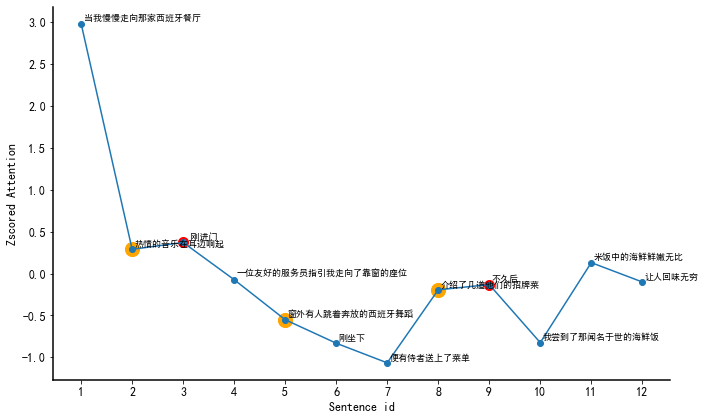

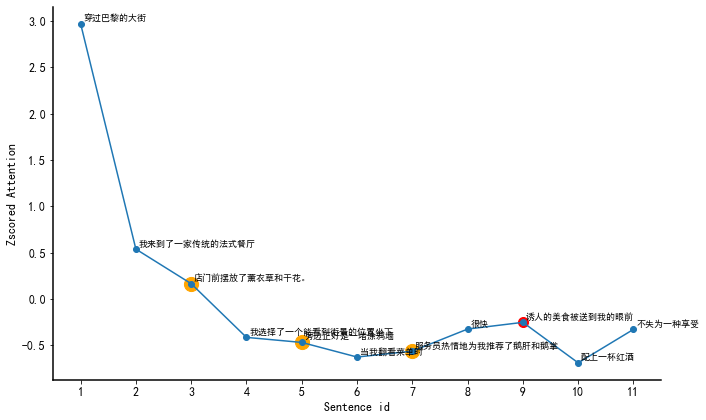

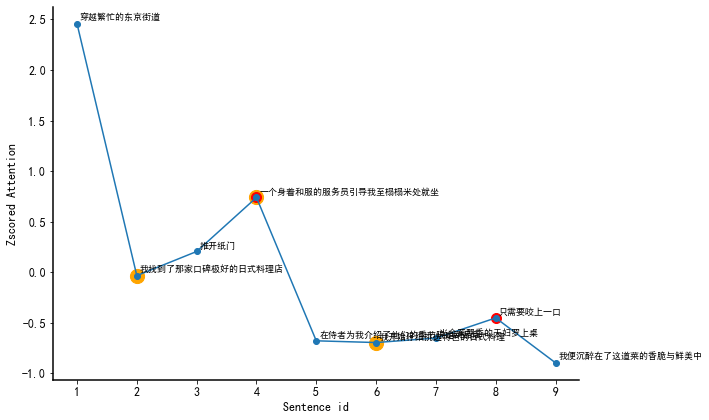

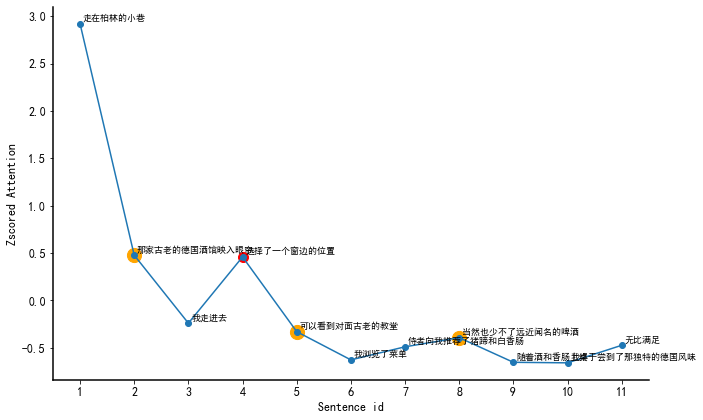

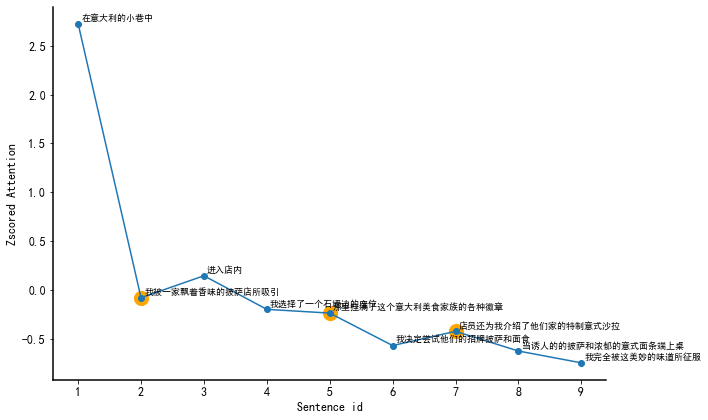

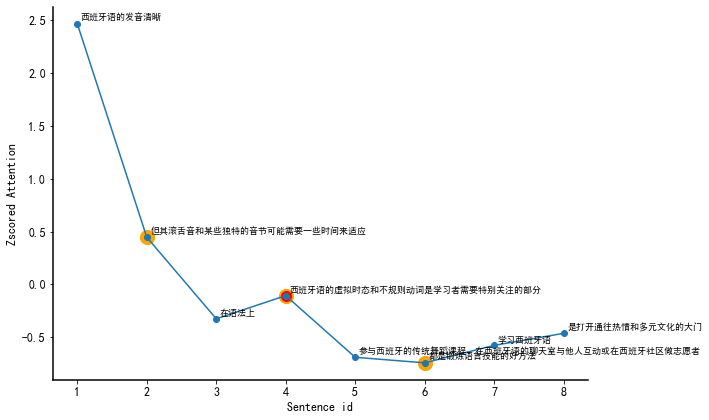

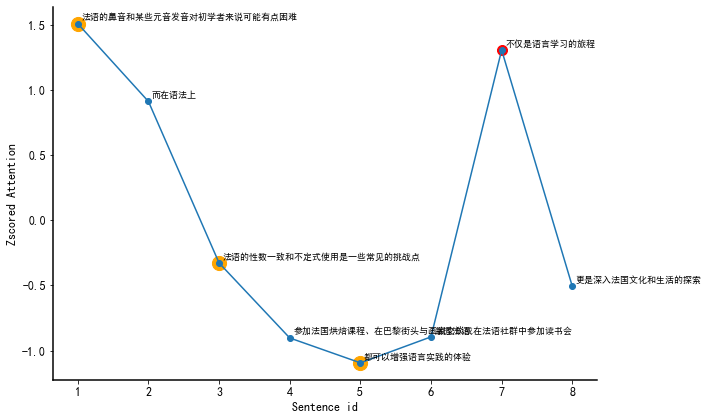

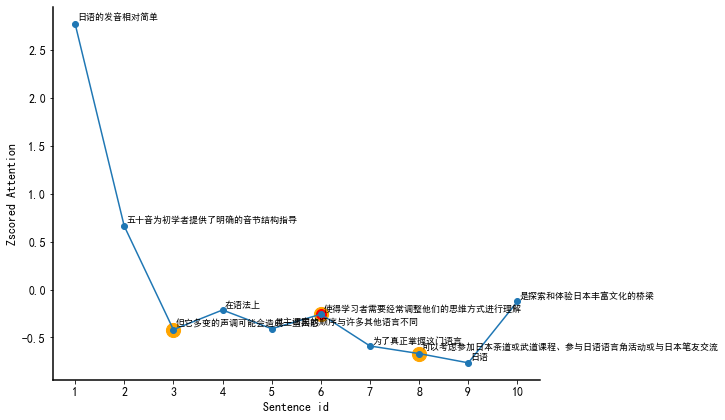

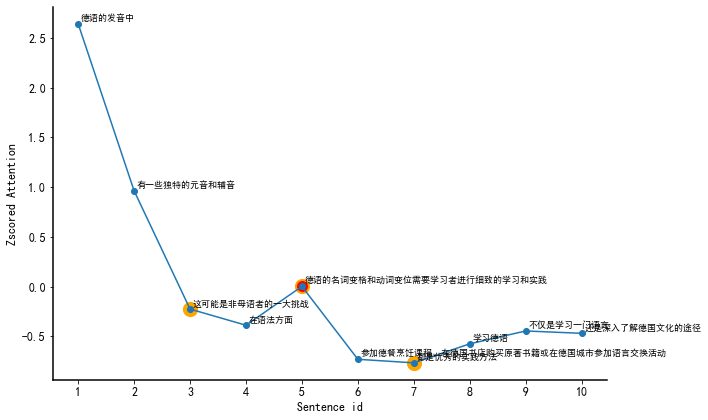

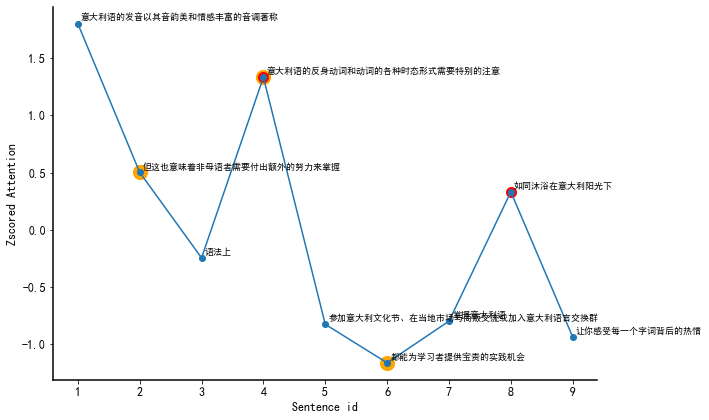

In [ ]:
from scipy.stats import zscore

model2 = GPT2Model.from_pretrained("F:/project/Attention/gpt2-chinese-cluecorpussmall", output_attentions=True)

model2.eval()

# corpus
with open("F:/project/Attention/corpus2.txt", "r", encoding="utf-8") as file:
    corpus = [line.strip() for line in file.readlines()]

with open("F:/project/Attention/true_sep2.txt", "r", encoding="utf-8") as file:
    true_sep = [line.strip() for line in file.readlines()]

import os
base_dir = 'F:/project/Attention/'
fig_outputpath = os.path.join(base_dir, 'StoryAttentions_CosineSimi_plot2')
os.makedirs(fig_outputpath, exist_ok=True)


for corpus_index, text in enumerate(corpus):  

    sentences = text.split('，')
    sentences = [sentence for sentence in sentences if sentence]

    sep = true_sep[corpus_index].split(',')
    sep = [int(i) for i in sep if i]

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model2(**inputs)

    input_ids = inputs['input_ids']
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    
    sep_positions = [pos for pos, token in enumerate(tokens) if token == "，"]
    
    num_sentences = len(sep_positions) 
    
    all_heads_attention = outputs.attentions[11][0][3,:,:]
    sentence_attention = torch.zeros((num_sentences, num_sentences))

    for i in range(num_sentences):
        start_from = 0 if i == 0 else sep_positions[i-1] + 1
        end_from = sep_positions[i]

        for j in range(num_sentences):
            start_to = 0 if j == 0 else sep_positions[j-1] + 1
            end_to = sep_positions[j]

            valid_attention_values = []
            for k in range(start_from, end_from):
                for l in range(start_to, end_to):
                    valid_attention_values.append(all_heads_attention[k, l])

            if valid_attention_values:
                sentence_attention[i, j] = torch.tensor(valid_attention_values).mean()
            else:
                sentence_attention[i, j] = torch.tensor(0.0)  
    

    similarities = []
    delta_similarities = []
    for i in range(num_sentences):
        if i < 1:
            similarities.append(sentence_attention[i,i]) 
            delta_similarities.append(0)
        else:
            similarities.append(sentence_attention[i,i-1]) 
            delta_similarities.append(similarities[i]-similarities[i-1])

    similarities = list(zscore(np.array(similarities)))
    delta_similarities = list(zscore(np.array(delta_similarities)))

    Index = [delta_similarities[i] * delta_similarities[i+1] for i in range(len(delta_similarities)-1)]
    Index =  Index + [0]

    # Font
    plt.rcParams['font.sans-serif'] = ['SimHei', 'SimSun', 'KaiTi', 'FangSong'] 
    plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})
    plt.rcParams['axes.unicode_minus'] = False  

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, sentence in enumerate(sentences):
        plt.text(i+0.05, similarities[i]+0.02, sentence, fontsize=9, ha='left', va='bottom')

    for i in sep:
        plt.scatter(i-1, similarities[i-1], color='orange', s=200, marker='o')

    for i in range(len(delta_similarities)):
        if np.sign(Index[i]) < 0 and i != 0 and delta_similarities[i+1] < -0.02:
            plt.scatter(i, similarities[i], color='red', s=100, marker='o')

    plt.plot(range(num_sentences), similarities, marker='o', linestyle='-')
    # plt.plot(range(len(sentences)), delta_similarities, marker='x', linestyle='-')
    # plt.plot(range(len(sentences)), np.sign(Index), marker='o', linestyle='-')


    plt.xticks(range(num_sentences), labels=range(1,num_sentences+1))
    plt.xlabel("Sentence id")
    plt.ylabel("Zscored Attention")


    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(1.5)
    for axis in ['top','right']:  
        ax.spines[axis].set_visible(False)

    if corpus_index in range(5):
        index = str(corpus_index+1)
        title = f'story_chain_eat{index}.png'
    else:
        index = str(corpus_index-10+1)
        title = f'story_fork_lan{index}.png'

    plt.tight_layout()
    # plt.legend()
    plt.savefig(
                os.path.join(fig_outputpath, title),
                dpi=300,
                format='png'
                )
    plt.show()